# **Tamil Character Image Classification**

# **Importing the dataset**

In [1]:
# Un-comment and run to download the dataset
#!wget http://shiftleft.com/mirrors/www.hpl.hp.com/india/research/penhw-resources/hpl-tamil-iso-char-offline-1.0.tar.gz
#!tar -xvf ./hpl-tamil-iso-char-offline-1.0.tar.gz

# **Importing necessary libraries**

In [ ]:
import os
import re
import cv2
import csv
import pickle
import keras
import shutil
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.layers import Dropout
from keras.layers import Flatten
from sklearn.model_selection import train_test_split
#from keras.preprocessing.image import ImageDataGenerator

# **Pre-processing**

1. plotIm(img_): Displays the input image img_ in grayscale using matplotlib.
2. bbox(img1): Computes the bounding box coordinates of the input binary image img1.
3. getUniformImage(img): Processes the input image img by first extracting its bounding box, resizing it to 100x100 pixels, padding it to 128x128 pixels, and converting it to a grayscale image before returning the processed image.

In [ ]:
def plotIm(img_):
  plt.imshow(img_, cmap='gray')
  plt.show()
def bbox(img1):
  img = 1 - img1
  rows = np.any(img, axis=1)
  cols = np.any(img, axis=0)
  rmin, rmax = np.where(rows)[0][[0, -1]]
  cmin, cmax = np.where(cols)[0][[0, -1]]
  return rmin, rmax, cmin, cmax
def getUniformImage(img):
    rmin, rmax, cmin, cmax = bbox(img)
    trimmedImg = img[rmin:rmax, cmin:cmax]
    resizedImg = cv2.resize(trimmedImg, dsize=(100, 100))
    paddedImg = np.ones((128,128))
    paddedImg[14:114,14:114] = resizedImg
    paddedImg = paddedImg.reshape(128, 128 , 1)
    return paddedImg

1. reading images from a dataset directory (datasetsLoc) organized into folders
2. process each image using the getUniformImage function to resize and pad it, 3. stores the processed images and their corresponding labels in lists (images and labels).
4. These lists are then serialized using pickle and saved as binary files (image_ALL_128x128.obj and label_ALL_128x128.obj).

In [ ]:
images=[]
labels=[]
numCategory = 156
datasetsLoc = './tamil_dataset_offline/'
w,h = 128,128
i = 0
shapeL=[]

for folders in os.listdir(datasetsLoc):
    for files in  os.listdir(datasetsLoc+str(folders)):
        if str(files) == 'Thumbs.db' or str(files) == 't03.tiff' or str(files) == '036t01.png':
          continue
        # print(str(folders))
        indx = int(str(files)[:3])
        if indx < numCategory:
            image = Image.open(datasetsLoc+str(folders)+'/'+str(files))
            img=np.asarray(image, dtype=np.uint8)
            shapeL.append(img.shape)
            img2 = getUniformImage(img)
            img2 = np.asarray(img2, dtype=np.uint8)
            images.append(img2)
            labels.append(indx)
        if i%8000 == 0:
            print(str(i)+ '  ' + str(len(labels)))
        i = i + 1
filIm = open('./image_ALL_128x128.obj', 'wb')
pickle.dump(images, filIm)
filLab = open('./label_ALL_128x128.obj', 'wb')
pickle.dump(labels, filLab)


0  1
8000  8001
16000  16001
24000  24001
32000  32001
40000  40001
48000  48001
56000  56001
64000  64001
72000  72001
80000  80001


In [ ]:
!mkdir -p /content/drive/My\ Drive/wkDir/

In [ ]:
!cp /content/image_ALL_128x128.obj /content/drive/My\ Drive/wkDir/image_ALL_128x128.obj
!cp /content/label_ALL_128x128.obj /content/drive/My\ Drive/wkDir/label_ALL_128x128.obj

In [ ]:
w, h = 128, 128
numCategory = 156
filIm = open('/content/drive/My Drive/wkDir/image_ALL_128x128.obj', 'rb')
images = pickle.load(filIm)
filLab = open('/content/drive/My Drive/wkDir/label_ALL_128x128.obj', 'rb')
labels = pickle.load(filLab)

In [ ]:
tamilCharacterCode = []
w,h=128,128
with open('/content/drive/My Drive/wkDir/unicodeTamil.csv', newline='') as f:
  reader = csv.reader(f)
  data = list(reader)
  for i in data:
    go = i[1].split(' ')
    charL = ""
    for gg in go:
      charL = charL + "\\u"+str(gg)
    tamilCharacterCode.append(charL.encode('utf-8').decode('unicode-escape'))
print(tamilCharacterCode)

['அ', 'ஆ', 'இ', 'ஈ', 'உ', 'ஊ', 'எ', 'ஏ', 'ஐ', 'ஒ', 'ஓ', 'ஃ', 'க', 'ங', 'ச', 'ஞ', 'ட', 'ண', 'த', 'ந', 'ப', 'ம', 'ய', 'ர', 'ல', 'வ', 'ழ', 'ள', 'ற', 'ன', 'ஸ', 'ஷ', 'ஜ', 'ஹ', 'க்ஷ', 'கி', 'ஙி', 'சி', 'ஞி', 'டி', 'ணி', 'தி', 'நி', 'பி', 'மி', 'யி', 'ரி', 'லி', 'வி', 'ழி', 'ளி', 'றி', 'னி', 'ஸி', 'ஷி', 'ஜி', 'ஹி', 'க்ஷி', 'கீ', 'ஙீ', 'சீ', 'ஞீ', 'டீ', 'ணீ', 'தீ', 'நீ', 'பீ', 'மீ', 'யீ', 'ரீ', 'லீ', 'வீ', 'ழீ', 'ளீ', 'றீ', 'னீ', 'ஸீ', 'ஷீ', 'ஜீ', 'ஹீ', 'க்ஷீ', 'கு', 'ஙு', 'சு', 'ஞு', 'டு', 'ணு', 'து', 'நு', 'பு', 'மு', 'யு', 'ரு', 'லு', 'வு', 'ழு', 'ளு', 'று', 'னு', 'கூ', 'ஙூ', 'சூ', 'ஞூ', 'டூ', 'ணூ', 'தூ', 'நூ', 'பூ', 'மூ', 'யூ', 'ரூ', 'லூ', 'வூ', 'ழூ', 'ளூ', 'றூ', 'னூ', 'ா', 'ெ', 'ே', 'ை', 'ஸ்ரீ', 'ஸு', 'ஷு', 'ஜு', 'ஹு', 'க்ஷு', 'ஸூ', 'ஷூ', 'ஜ0BC2', 'ஹூ', 'க்ஷூ', 'க்', 'ங்', 'ச்', 'ஞ்', 'ட்', 'ண்', 'த்', 'ந்', 'ப்', 'ம்', 'ய்', 'ர்', 'ல்', 'வ்', 'ழ்', 'ள்', 'ற்', 'ன்', 'ஸ்', 'ஷ்', 'ஜ்', 'ஹ்', 'க்ஷ்', 'ஔ']


# **Spllitting the dataset**

In [ ]:
images=np.array(images)
labels=np.array(labels,dtype=np.uint8)
y_labels=to_categorical(labels)
X_train, X_test, y_train, y_test = train_test_split(images, y_labels, test_size=0.25, random_state=42)
keras.initializers.lecun_uniform(seed=None)
print(X_train.shape, y_train.shape,X_test.shape,y_test.shape)

(62182, 128, 128, 1) (62182, 156) (20728, 128, 128, 1) (20728, 156)


ஏ


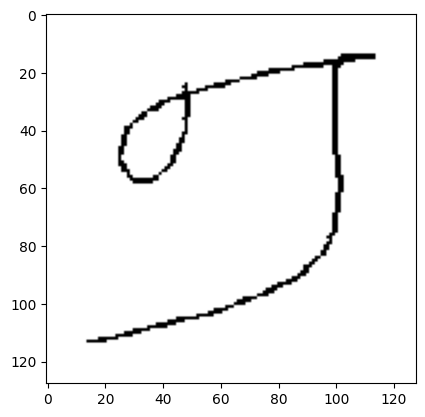

In [ ]:
ridx = np.random.randint(X_train.shape[0])
print(tamilCharacterCode[np.argmax(y_train[ridx])])
plotIm(X_train[ridx].reshape(w,h))

# **Convolutional Neural Network Model**

1. Max-pooling layers help in downsampling the feature maps, retaining essential information while reducing computational load and overfitting.
2. Dropout layers with a dropout rate of 0.2 are included to regularize the model and prevent it from memorizing noise in the training data, thus improving generalization.
3. *The* inclusion of dense layers with ReLU activation helps in learning non-linear relationships within the extracted features, leading to better classification performance.

In [ ]:
model = Sequential()
model.add(Conv2D(64, (5, 5), input_shape=(w,h,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(156, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 124, 124, 64)        │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 58, 58, 32)          │          51,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 29, 29, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 25, 25, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 32)            │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 156)                 │          40,092 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 275,580 (1.05 MB)

 Trainable params: 275,580 (1.05 MB)

 Non-trainable params: 0 (0.00 B)

Training the CNN model

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=100, verbose=1)
TrainAccuracy = model.evaluate(X_train, y_train, verbose=1)
TestAccuracy = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 60s 78ms/step - accuracy: 0.1448 - loss: 4.1130 - val_accuracy: 0.7516 - val_loss: 0.8088
Epoch 2/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 61s 58ms/step - accuracy: 0.7466 - loss: 0.8199 - val_accuracy: 0.8418 - val_loss: 0.5013
Epoch 3/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 41s 58ms/step - accuracy: 0.8342 - loss: 0.5268 - val_accuracy: 0.8777 - val_loss: 0.3840
Epoch 4/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 41s 58ms/step - accuracy: 0.8604 - loss: 0.4306 - val_accuracy: 0.8904 - val_loss: 0.3382
Epoch 5/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 41s 58ms/step - accuracy: 0.8787 - loss: 0.3645 - val_accuracy: 0.9023 - val_loss: 0.3117
Epoch 6/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 36s 59ms/step - accuracy: 0.8949 - loss: 0.3114 - val_accuracy: 0.9054 - val_loss: 0.2912
Epoch 7/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 41s 59ms/step - accuracy: 0.9032 - loss: 0.2911 - val_accuracy: 0.9087 - val_loss: 0.2819
Epoch 8/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 41s 59ms/step - accuracy: 0.9080 - loss: 0.2703 - 

In [ ]:
print(TrainAccuracy)

[0.062060169875621796, 0.978981077671051]


In [ ]:
print(TestAccuracy)

[0.2477366179227829, 0.925511360168457]


There is some overfitting because:

- Training accuracy (97.8%) is significantly higher than test accuracy (92.5%), meaning the model performs better on the training data than on unseen data.
- Test loss (0.247) is much higher than training loss (0.062), which suggests the model may be memorizing training data rather than generalizing.

To reduce overfitting, I made the following improvements to your CNN architecture:
- Added L2 Regularization to prevent weight over-reliance.
- Increased Dropout to 0.3 in fully connected layers for better regularization.
- Reduced Conv2D filter sizes to make the model less complex.
- Batch Normalization to stabilize learning and improve generalization.
- Added another Dense layer with fewer neurons to control overfitting.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.regularizers import l2

model = Sequential()

# First Convolution Block
model.add(Conv2D(64, (3, 3), input_shape=(w, h, 1), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Second Convolution Block
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Third Convolution Block
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Fourth Convolution Block
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Fully Connected Layers
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.4))
model.add(Dense(156, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 126, 126, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 12, 12, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 232,028 (906.36 KB)

 Trainable params: 231,644 (904.86 KB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
model.fit(X_train, y_train, epochs=20, batch_size=100, verbose=1)
TrainAccuracy = model.evaluate(X_train, y_train, verbose=1)
TestAccuracy = model.evaluate(X_test, y_test, verbose=1)

Epoch 1/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 65s 82ms/step - accuracy: 0.0564 - loss: 5.0566
Epoch 2/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 61s 64ms/step - accuracy: 0.3544 - loss: 2.6289
Epoch 3/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 41s 65ms/step - accuracy: 0.4999 - loss: 1.9913
Epoch 4/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 41s 64ms/step - accuracy: 0.5763 - loss: 1.7333
Epoch 5/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 41s 64ms/step - accuracy: 0.6150 - loss: 1.5829
Epoch 6/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 41s 64ms/step - accuracy: 0.6349 - loss: 1.5078
Epoch 7/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 41s 64ms/step - accuracy: 0.6552 - loss: 1.4357
Epoch 8/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.6724 - loss: 1.3960
Epoch 9/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 41s 64ms/step - accuracy: 0.6857 - loss: 1.3581
Epoch 10/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.6979 - loss: 1.3034
Epoch 11/20
622/622 ━━━━━━━━━━━━━━━━━━━━ 41s 64ms/step - accuracy: 0.7058 - loss: 1.2843
Epoch 12/20
622/622 ━━━━━━━━━━

In [ ]:
print(TrainAccuracy)

[1.4836870431900024, 0.7829789876937866]


In [ ]:
print(TestAccuracy)

[1.5383129119873047, 0.7226167798042297]


# **Model prediction - Demo**

In [ ]:
tamilCharacterCode = []
w,h=128,128
with open('/content/drive/My Drive/wkDir/unicodeTamil.csv', newline='') as f:
  reader = csv.reader(f)
  data = list(reader)
  for i in data:
    go = i[1].split(' ')
    charL = ""
    for gg in go:
      charL = charL + "\\u"+str(gg)
    tamilCharacterCode.append(charL.encode('utf-8').decode('unicode-escape'))
print(tamilCharacterCode)

['அ', 'ஆ', 'இ', 'ஈ', 'உ', 'ஊ', 'எ', 'ஏ', 'ஐ', 'ஒ', 'ஓ', 'ஃ', 'க', 'ங', 'ச', 'ஞ', 'ட', 'ண', 'த', 'ந', 'ப', 'ம', 'ய', 'ர', 'ல', 'வ', 'ழ', 'ள', 'ற', 'ன', 'ஸ', 'ஷ', 'ஜ', 'ஹ', 'க்ஷ', 'கி', 'ஙி', 'சி', 'ஞி', 'டி', 'ணி', 'தி', 'நி', 'பி', 'மி', 'யி', 'ரி', 'லி', 'வி', 'ழி', 'ளி', 'றி', 'னி', 'ஸி', 'ஷி', 'ஜி', 'ஹி', 'க்ஷி', 'கீ', 'ஙீ', 'சீ', 'ஞீ', 'டீ', 'ணீ', 'தீ', 'நீ', 'பீ', 'மீ', 'யீ', 'ரீ', 'லீ', 'வீ', 'ழீ', 'ளீ', 'றீ', 'னீ', 'ஸீ', 'ஷீ', 'ஜீ', 'ஹீ', 'க்ஷீ', 'கு', 'ஙு', 'சு', 'ஞு', 'டு', 'ணு', 'து', 'நு', 'பு', 'மு', 'யு', 'ரு', 'லு', 'வு', 'ழு', 'ளு', 'று', 'னு', 'கூ', 'ஙூ', 'சூ', 'ஞூ', 'டூ', 'ணூ', 'தூ', 'நூ', 'பூ', 'மூ', 'யூ', 'ரூ', 'லூ', 'வூ', 'ழூ', 'ளூ', 'றூ', 'னூ', 'ா', 'ெ', 'ே', 'ை', 'ஸ்ரீ', 'ஸு', 'ஷு', 'ஜு', 'ஹு', 'க்ஷு', 'ஸூ', 'ஷூ', 'ஜ0BC2', 'ஹூ', 'க்ஷூ', 'க்', 'ங்', 'ச்', 'ஞ்', 'ட்', 'ண்', 'த்', 'ந்', 'ப்', 'ம்', 'ய்', 'ர்', 'ல்', 'வ்', 'ழ்', 'ள்', 'ற்', 'ன்', 'ஸ்', 'ஷ்', 'ஜ்', 'ஹ்', 'க்ஷ்', 'ஔ']


In [ ]:
from tensorflow.keras.models import load_model
import cv2

# Load the saved model
model = load_model("/content/drive/MyDrive/wkDir/tamilALLEzhuthukalKeras_Model.h5")

# Preprocess the uploaded image
def preprocess_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale
    img = cv2.resize(img, (128, 128))  # Resize the image to 128x128 pixels
    img = img.astype('float32') / 255  # Normalize the pixel values
    img = img.reshape(1, 128, 128, 1)  # Reshape for model input (add batch dimension)
    return img

#uploaded_image_path = '/content/input1.png'
uploaded_image_path = '/content/input3.png'

# Preprocess the uploaded image
processed_image = preprocess_image(uploaded_image_path)

# Make predictions using the loaded model
predictions = model.predict(processed_image)

# Decode the predictions to get the predicted Tamil character
predicted_character_index = predictions.argmax(axis=1)[0]
predicted_character = tamilCharacterCode[predicted_character_index]

print("Predicted Tamil Character:", predicted_character)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step
Predicted Tamil Character: க
